COMP9727 Assignment1 Z5547362 Shichu Zhang

Part 1. Topic Classification


In [1]:
import pandas as pd
import numpy as np
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score

ps = PorterStemmer()
lem = WordNetLemmatizer()


nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))
sk_stop_words = set(ENGLISH_STOP_WORDS)

lemmatizer = WordNetLemmatizer()
# initialization
df = pd.read_csv("dataset.tsv", sep='\t')

texts = df['lyrics'].astype(str)
labels = df['topic']

# print(labels)

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/zhangshichu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zhangshichu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/zhangshichu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


1.i. fix the mistakes that remove too many special characters
    

In [2]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)     # Check what this removes --- might be too much!
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [ps.stem(word) for word in tokens]
    return ' '.join(tokens)

In this function, the regex will delete all strings but numbers ,letters and spaces, but due to the styles of music, we may need to keep some signs like "-", "\'" and so on.

part1.2, 3 fix the mistakes that the evaluation is based on only one trainingtest split rather than using cross-validation.


In [3]:
# from sklearn.model_selection import train_test_split

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, df['Category'], test_size=0.2, random_state=42)

In this function, the split of the dataset based on the train_test_split, which may mislead the estimate of the model performance. It would be better to use cross_val_score.


2.Develop the MNB model and preprocesses

In [4]:


stop_words = set(stopwords.words("english"))
sk_stop_words = set(CountVectorizer(stop_words="english").get_stop_words())

vectorizer = CountVectorizer()
bnb = BernoulliNB()
mnb = MultinomialNB()

def evaluate_preprocessing(function, texts, labels):
    processed = [function(t) for t in texts]
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(processed)
    scores1 = cross_val_score(mnb, X, labels, cv=5, scoring='accuracy')
    scores2 = cross_val_score(bnb, X, labels, cv=5, scoring='accuracy')
    return (scores1.mean(), scores2.mean())

def no_preprocess(text):
    return text

def preprocess_text1(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [ps.stem(word) for word in tokens]
    return ' '.join(tokens)

def preprocess_text2(text):
    text = text.lower()
    text = re.sub(r"[^\w\s'&*@#-]", '', text)
    tokens = word_tokenize(text)
    tokens = [ps.stem(word) for word in tokens]
    return ' '.join(tokens)

def preprocess_text3(text):
    text = text.lower()
    text = re.sub(r"[^\w\s'&*@#-]", '', text)
    tokens = word_tokenize(text)
    return ' '.join(tokens)

def preprocess_sk_stop(text):
    text = text.lower()
    text = re.sub(r"[^\w\s]", "", text)
    tokens = word_tokenize(text)
    tokens = [ps.stem(word) for word in tokens]
    return " ".join(tokens)

def preprocess_v0(text):
    text = re.sub(r"[^\w\s'-]", '', text)
    return ' '.join([lem.lemmatize(w) for w in text.split()])

def preprocess_v1(text):
    text = re.sub(r"[^\w\s'&*@#$-]", '', text)
    return ' '.join([lem.lemmatize(w) for w in text.split()])

def preprocess_v2(text):
    text = re.sub(r"[^\w\s'-]", '', text)
    text = ' '.join([ps.stem(w) for w in text.split()])
    return ' '.join([lem.lemmatize(w) for w in text.split()])

def preprocess_v3(text):
    return ' '.join([ps.stem(w) for w in text.split()])

def preprocess_v4(text):
    return ' '.join([lem.lemmatize(w) for w in text.split()])

def preprocess_v4_1(text):
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join([lem.lemmatize(w) for w in tokens])

def preprocess_v4_2(text):
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in sk_stop_words]
    return ' '.join([lem.lemmatize(w) for w in tokens])

def preprocess_v5(text):
    text = ' '.join([ps.stem(w) for w in text.split()])
    return ' '.join([lem.lemmatize(w) for w in text.split()])

def preprocess_v_sl(text):
    text = text.lower()
    text = re.sub(r"[^\w\s'-]", '', text)
    text = ' '.join([w for w in text.split() if w not in stop_words])
    return ' '.join([lem.lemmatize(w) for w in text.split()])

def preprocess_v_skl(text):
    text = text.lower()
    text = re.sub(r"[^\w\s'-]", '', text)
    text = ' '.join([w for w in text.split() if w not in sk_stop_words])
    return ' '.join([lem.lemmatize(w) for w in text.split()])

def preprocess_v_sks(text):
    text = text.lower()
    text = re.sub(r"[^\w\s'-]", '', text)
    text = ' '.join([w for w in text.split() if w not in sk_stop_words])
    return ' '.join([ps.stem(w) for w in text.split()])


acc0 = evaluate_preprocessing(no_preprocess, texts, labels)
acc1 = evaluate_preprocessing(preprocess_text1, texts, labels)
acc2 = evaluate_preprocessing(preprocess_text2, texts, labels)
acc3 = evaluate_preprocessing(preprocess_text3, texts, labels)
acc4 = evaluate_preprocessing(preprocess_v0, texts, labels)
acc5 = evaluate_preprocessing(preprocess_v1, texts, labels)
acc6 = evaluate_preprocessing(preprocess_v2, texts, labels)
acc7 = evaluate_preprocessing(preprocess_v3, texts, labels)
acc8 = evaluate_preprocessing(preprocess_v4, texts, labels)
acc9 = evaluate_preprocessing(preprocess_v5, texts, labels)
acc11 = evaluate_preprocessing(preprocess_v_sl, texts, labels)
acc12 = evaluate_preprocessing(preprocess_v_skl, texts, labels)
acc13 = evaluate_preprocessing(preprocess_v_sks, texts, labels)

acc_results = {
    "acc0": acc0,
    "acc1": acc1,
    "acc2": acc2,
    "acc3": acc3,
    "acc4": acc4,
    "acc5": acc5,
    "acc6": acc6,
    "acc7": acc7,
    "acc8": acc8,
    "acc9": acc9,
    "acc11": acc11,
    "acc12": acc12,
    "acc13": acc13,
}

print(f"{'Name':<6} {'MNB':>6} {'BNB':>6}")
for name, (mnb_acc, bnb_acc) in acc_results.items():
    print(f"{name:<6} {mnb_acc:>6.4f} {bnb_acc:>6.4f}")


Name      MNB    BNB
acc0   0.7900 0.5307
acc1   0.7840 0.5233
acc2   0.7840 0.5233
acc3   0.7827 0.5300
acc4   0.7927 0.5260
acc5   0.7927 0.5260
acc6   0.7860 0.5233
acc7   0.7867 0.5233
acc8   0.7927 0.5260
acc9   0.7860 0.5233
acc11  0.7940 0.5260
acc12  0.7820 0.5200
acc13  0.7793 0.5220


3. Due to the results of the acc0-13, we can see that the acc11 which use lem has the highest accuracy, and the first data is the accuracy of mnb, 2nd data is the accuracy of bnb, so we would think mnb is superior.

part1.4

In [5]:
import matplotlib.pyplot as plt

def evaluate_models_with_n(preprocessor, texts, labels, n_values):
    mnb_scores = []
    bnb_scores = []

    for n in n_values:
        processed = [preprocessor(t) for t in texts]

        vectorizer_mnb = CountVectorizer(max_features=n)
        vectorizer_bnb = CountVectorizer(max_features=n, binary=True)

        X_mnb = vectorizer_mnb.fit_transform(processed)
        X_bnb = vectorizer_bnb.fit_transform(processed)

        mnb = MultinomialNB()
        bnb = BernoulliNB()

        score_mnb = cross_val_score(mnb, X_mnb, labels, cv=5, scoring='accuracy').mean()
        score_bnb = cross_val_score(bnb, X_bnb, labels, cv=5, scoring='accuracy').mean()

        mnb_scores.append(score_mnb)
        bnb_scores.append(score_bnb)

    return mnb_scores, bnb_scores


N         MNB    BNB
200    0.8327 0.6233
400    0.8607 0.6560
600    0.8547 0.6533
800    0.8407 0.6447
1000   0.8327 0.6287
all    0.7820 0.5200


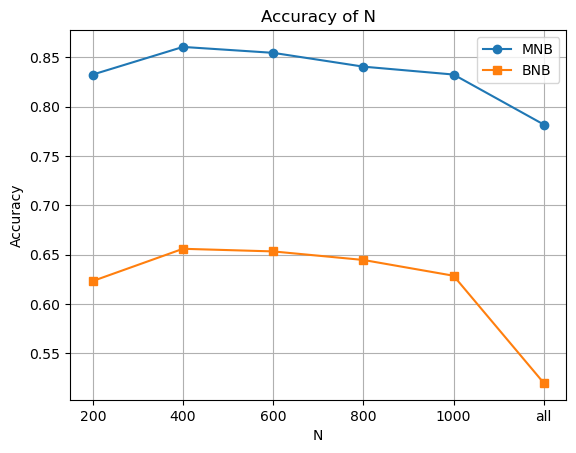

In [6]:
n_values = [200, 400, 600, 800, 1000, None] # different values for the N
n_labels = n_values[:-1] + ['all'] # also check when we get all words

mnb_scores, bnb_scores = evaluate_models_with_n(preprocess_v_skl, texts, labels, n_values)


print(f"{'N':<6} {'MNB':>6} {'BNB':>6}")
for n_label, m, b in zip(n_labels, mnb_scores, bnb_scores):
    print(f"{n_label:<6} {m:>6.4f} {b:>6.4f}")

plt.plot(n_labels, mnb_scores, marker='o', label='MNB')
plt.plot(n_labels, bnb_scores, marker='s', label='BNB')
plt.xlabel("N")
plt.ylabel("Accuracy")
plt.title("Accuracy of N")
plt.legend()
plt.grid(True)
plt.show()


From the graph we can see that the accuracy is highest when N is around 400.

part1.5

In [7]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
svm = LinearSVC()
mnb = MultinomialNB()
bnb = BernoulliNB()

def evaluate_preprocessing_3(function, texts, labels):
    processed = [function(t) for t in texts]
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(processed)
    model1 = mnb
    model2 = bnb
    model3 = svm
    scores1 = cross_val_score(model1, X, labels, cv=5, scoring='accuracy')
    scores2 = cross_val_score(model2, X, labels, cv=5, scoring='accuracy')
    scores3 = cross_val_score(model3, X, labels, cv=5, scoring='accuracy')
    return (scores1.mean(), scores2.mean(), scores3.mean())

acc = evaluate_preprocessing_3(preprocess_v_sl, texts, labels)
# print(acc)
print(f"{'Models':<10} {'ACC'}")
print(f"{'MNB':<10} {acc[0]:.3f}")
print(f"{'BNB':<10} {acc[1]:.3f}")
print(f"{'SVM':<10} {acc[2]:.3f}")


/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Models     ACC
MNB        0.794
BNB        0.526
SVM        0.847


/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


From the table we can see that the SVM model has a higher accuracy, so it is superior.

part2.1

In [8]:
topic_names = ['dark', 'sadness', 'personal', 'lifestyle', 'emotion']

processed_all = [preprocess_v_sl(t) for t in texts]

vectorizer = CountVectorizer(max_features=400) # As we found that when N = 400, the acc is almost the highest
X_all = vectorizer.fit_transform(processed_all)
X_train = X_all[:750]
X_test = X_all[750:]

svm.fit(X_train, labels[:750])
predicted_topics = svm.predict(X_all)


/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [9]:
def load_user_keywords(filepath):
    user_keywords = {}
    with open(filepath, 'r', encoding='utf-8') as f:
        for line in f:
            parts = line.strip().split('\t')
            topic, keywords_str = parts
            keywords = [k.strip().lower() for k in keywords_str.split(',')]
            user_keywords[topic.lower()] = keywords
            if 'topic' in user_keywords:
                user_keywords.pop('topic')
            
    return user_keywords

user1_keywords = load_user_keywords('user1.tsv')
user2_keywords = load_user_keywords('user2.tsv')
user3_keywords = load_user_keywords('user3.tsv')
# print('user1:', user1_keywords)
# print('user2:', user2_keywords)
# print('user3:', user3_keywords)

In [10]:
def build_user_documents_p(texts, processed_texts, predicted_topics, user_keywords): # to get the documents of the users' profile
    liked_docs = {t: [] for t in topic_names}
    for i, processed in enumerate(processed_texts):
        topic = predicted_topics[i]
        keywords = user_keywords.get(topic, [])
        if keywords and any(kw in processed for kw in keywords):
            liked_docs[topic].append(texts[i])
    return liked_docs


texts_train = texts[:750]
processed_train = [preprocess_v_sl(t) for t in texts_train]

def extract_top_words_from_liked_docs(liked_docs): # to get the top 20 words of each topics of users
    topic_docs = [' '.join(liked_docs[t]) for t in liked_docs]
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(topic_docs)
    feature_names = vectorizer.get_feature_names_out()

    result = {}
    for i, topic in enumerate(liked_docs):
        vec = tfidf_matrix[i].toarray().flatten()
        if np.sum(vec) == 0:
            result[topic] = []
        else:
            top_idx = np.argsort(vec)[-20:][::-1]
            top_words = [feature_names[j] for j in top_idx]
            result[topic] = top_words
    return result


        
liked_docs_user1 = build_user_documents_p(texts_train, processed_train, predicted_topics[:750], user1_keywords)
print('user1: \n', extract_top_words_from_liked_docs(liked_docs_user1))
liked_docs_user2 = build_user_documents_p(texts_train, processed_train, predicted_topics[:750], user2_keywords)
print('user2: \n', extract_top_words_from_liked_docs(liked_docs_user2))
liked_docs_user3 = build_user_documents_p(texts_train, processed_train, predicted_topics[:750], user3_keywords)
print('user3: \n', extract_top_words_from_liked_docs(liked_docs_user3))

user1: 
 {'dark': ['fight', 'blood', 'like', 'know', 'grind', 'come', 'stand', 'black', 'yeah', 'tell', 'gonna', 'kill', 'hand', 'head', 'time', 'cause', 'drown', 'build', 'lanky', 'dilly'], 'sadness': ['cry', 'club', 'tear', 'know', 'steal', 'think', 'mean', 'baby', 'say', 'true', 'write', 'face', 'eye', 'leave', 'music', 'time', 'want', 'heart', 'feel', 'blame'], 'personal': ['life', 'live', 'know', 'world', 'yeah', 'change', 'time', 'like', 'ordinary', 'dream', 'wanna', 'come', 'thank', 'teach', 'think', 'need', 'lord', 'feel', 'go', 'cause'], 'lifestyle': ['night', 'come', 'song', 'time', 'tonight', 'home', 'long', 'strangers', 'sing', 'right', 'yeah', 'wanna', 'spoil', 'wait', 'like', 'closer', 'know', 'tire', 'mind', 'play'], 'emotion': ['good', 'feel', 'touch', 'know', 'hold', 'visions', 'loove', 'video', 'go', 'want', 'gimme', 'vibe', 'morning', 'kiss', 'lovin', 'like', 'miss', 'baby', 'yeah', 'time']}
user2: 
 {'dark': [], 'sadness': ['heart', 'break', 'inside', 'away', 'like'

part2.2

In [11]:

from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def build_user_documents_r(texts, predicted_topics, user_keywords, topic_names): # to get the documents of users for recommendation
    liked_docs = {t: [] for t in topic_names}
    for i, text in enumerate(texts):
        topic = predicted_topics[i]
        keywords = user_keywords.get(topic, [])
        if keywords and any(kw in text.lower() for kw in keywords):
            liked_docs[topic].append(text)
    return liked_docs

def run_recommendation(user_keywords, texts, predicted_topics, topic_names, N, M):
    texts_train = texts[:750]
    texts_test = texts[750:1000]
    predicted_train = predicted_topics[:750]
    predicted_test = predicted_topics[750:1000]

    liked_docs = build_user_documents_r(texts_train, predicted_train, user_keywords, topic_names)

    topic_docs = [' '.join(liked_docs[t]) for t in topic_names]
    texts_test = list(texts_test)

    vectorizer = TfidfVectorizer()
    vectorizer.fit(topic_docs + texts_test)
    profile_matrix = vectorizer.transform(topic_docs).toarray()
    test_matrix = vectorizer.transform(texts_test).toarray()

    if M: # to compare the precision and recall with different M
        for i in range(profile_matrix.shape[0]):
            vec = profile_matrix[i]
            top_idx = np.argsort(vec)[-M:]
            mask = np.zeros_like(vec)
            mask[top_idx] = vec[top_idx]
            profile_matrix[i] = mask

    liked_topics = list(user_keywords.keys())
    selected = set()
    final_recommend = []

    for topic in liked_topics:
        if topic not in topic_names:
            continue
        t_idx = topic_names.index(topic)
        prof_vec = profile_matrix[t_idx]
        candidates = [i for i, t in enumerate(predicted_test) if t == topic]
        if not candidates:
            continue
        sims = [(i, cosine_similarity([prof_vec], [test_matrix[i]])[0][0]) for i in candidates]
        best = max(sims, key=lambda x: x[1])
        final_recommend.append(best[0])
        selected.add(best[0])

    scores = []
    for i, topic in enumerate(predicted_test):
        if topic not in liked_topics:
            continue
        t_idx = topic_names.index(topic)
        score = cosine_similarity([profile_matrix[t_idx]], [test_matrix[i]])[0][0]
        scores.append((i, score))
    scores.sort(key=lambda x: x[1], reverse=True)
#    unlike just choose the top N songs, I would like to use the recommendation algorithm of Bilibili, which would not just recommend 
#    the first N songs but recommend at least 1 song for users in their interested topic.
    for i, _ in scores:
        if i not in selected:
            final_recommend.append(i)
        if len(final_recommend) >= N:
            break


    hits = 0
    for i in final_recommend:
        topic = predicted_test[i]
        if topic in user_keywords and any(kw in texts_test[i].lower() for kw in user_keywords[topic]):
            hits += 1

    precision = hits / (len(final_recommend) + 0.01) # to avoid div 0
    total_relevant = sum(
        1 for i, topic in enumerate(predicted_test)
        if topic in user_keywords and any(kw in texts_test[i].lower() for kw in user_keywords[topic])
    )
    recall = hits / (total_relevant + 0.01) # to avoid div 0

    return {
        "N": N,
        "M": M,
        "precision": precision,
        "recall": recall,
        "recommended_indices": final_recommend
    }


In [12]:
result1 = run_recommendation(
    user_keywords=user1_keywords,
    texts=texts,
    predicted_topics=predicted_topics,
    topic_names=topic_names,
    N=10,
    M=20
)
print('user1:', result1)

result1 = run_recommendation(
    user_keywords=user1_keywords,
    texts=texts,
    predicted_topics=predicted_topics,
    topic_names=topic_names,
    N=20,
    M=20
)
print('user1:', result1)

result1 = run_recommendation(
    user_keywords=user1_keywords,
    texts=texts,
    predicted_topics=predicted_topics,
    topic_names=topic_names,
    N=20,
    M=None
)
print('user1:', result1)

result1 = run_recommendation(
    user_keywords=user1_keywords,
    texts=texts,
    predicted_topics=predicted_topics,
    topic_names=topic_names,
    N=20,
    M=10
)
print('user1:', result1)

result2 = run_recommendation(
    user_keywords=user2_keywords,
    texts=texts,
    predicted_topics=predicted_topics,
    topic_names=topic_names,
    N=10,
    M=20
)
print('user2:', result2)

result3 = run_recommendation(
    user_keywords=user3_keywords,
    texts=texts,
    predicted_topics=predicted_topics,
    topic_names=topic_names,
    N=10,
    M=20
)
print('user3:', result3)

result3 = run_recommendation(
    user_keywords=user3_keywords,
    texts=texts,
    predicted_topics=predicted_topics,
    topic_names=topic_names,
    N=10,
    M=None
)
print('user3:', result3)

user1: {'N': 10, 'M': 20, 'precision': 0.999000999000999, 'recall': 0.11234692731153802, 'recommended_indices': [34, 157, 90, 188, 219, 194, 242, 20, 176, 8]}
user1: {'N': 20, 'M': 20, 'precision': 0.9495252373813092, 'recall': 0.21345916189192224, 'recommended_indices': [34, 157, 90, 188, 219, 194, 242, 20, 176, 8, 125, 113, 178, 133, 98, 134, 27, 6, 173, 45]}
user1: {'N': 20, 'M': None, 'precision': 0.9995002498750624, 'recall': 0.22469385462307603, 'recommended_indices': [34, 157, 176, 45, 194, 219, 242, 20, 90, 113, 8, 98, 125, 178, 173, 104, 188, 6, 134, 131]}
user1: {'N': 20, 'M': 10, 'precision': 0.9495252373813092, 'recall': 0.21345916189192224, 'recommended_indices': [34, 157, 90, 188, 194, 219, 242, 20, 8, 133, 125, 176, 113, 27, 98, 178, 173, 134, 66, 104]}
user2: {'N': 10, 'M': 20, 'precision': 0.1998001998001998, 'recall': 0.1998001998001998, 'recommended_indices': [239, 219, 194, 44, 127, 242, 31, 16, 52, 20]}
user3: {'N': 10, 'M': 20, 'precision': 0.6993006993006993, 're

part 3

In [28]:
week1_indices =  [3, 18, 47, 89, 112, 135, 166, 189, 203, 248]
week2_indices =  [257, 266, 298, 301, 325, 350, 375, 389, 410, 445]
week3_indices =  [520, 531, 558, 562, 600, 618, 645, 662, 700, 745]
shown_indices = week1_indices + week2_indices + week3_indices
liked_indices = [18, 112, 166, 298, 301, 325, 562, 600, 645, 700, 745]
liked_texts = [texts[i] for i in liked_indices]
liked_topics = [predicted_topics[i] for i in liked_indices]
# print(liked_topics)
simulated_user_keywords = {}
for idx, topic in enumerate(liked_topics):
    tname = topic_names[topic] if isinstance(topic, int) else topic
    if tname not in simulated_user_keywords:
        simulated_user_keywords[tname] = []
    simulated_user_keywords[tname].extend(texts[liked_indices[idx]].lower().split())

for t in simulated_user_keywords:
    simulated_user_keywords[t] = list(set(simulated_user_keywords[t]))[:5]
    
    
result1 = run_recommendation(
    user_keywords=simulated_user_keywords,
    texts=texts,
    predicted_topics=predicted_topics,
    topic_names=topic_names,
    N=20,
    M=10, 
)


print(result1)
result_true = {
    'N': 20,
    'M': 10,
    'precision': 0.50,
}
print(result_true)


{'N': 20, 'M': 10, 'precision': 0.5997001499250374, 'recall': 0.15187950892292115, 'recommended_indices': [194, 223, 188, 140, 8, 219, 242, 20, 27, 26, 178, 125, 90, 6, 133, 98, 243, 215, 182, 116]}
{'N': 20, 'M': 10, 'precision': 0.5}


From part2 we can find that when we have N about 20, we would get higher precision and recall, and the M's influence is not that obvious, maybe because the dataset is not big enough, or because 10 top words is enough to confirm a song. So we choose M = 20, and N = 10.
Since it's impossible for the friend to listen all 250 songs in week4, I can't get the recall of him.
But we can check the precision of him, which is lower than the predicted values, this may because the classification is not that precise, as the highest acc I get is less than 90%, also, I didn't use the normal recommendation algorithm, instead I choose to recommend at least 1 song for his preference. Maybe it is kind of low efficient in this case, but as the theory of industrial recommendation, this method may gain long-term adhesiveness of users. As monotonous recommendation may be valid in few times, variable styles of the recommendation topics would give users better experience when using the applications.